# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [605]:
#importing require libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #split orginal data for taining and testing
from sklearn.linear_model import LinearRegression
from sklearn import metrics #finding error

In [606]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 2. Loading and Cleaning with Pandas

In [607]:
#loading the data from cvs file to pandas datafrmae
train_df = pd.read_csv('/content/train-data.csv')
test_df = pd.read_csv('/content/test-data.csv')

In [608]:
#inspecting the first 5 rowa of the dataframe
train_df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [609]:
test_df.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [610]:
#dropping unnamed: 0 column 
train_df = train_df.drop('Unnamed: 0', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)
train_df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [611]:
test_df.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [612]:
#checking the number of rows and columns
train_df.shape

(6019, 13)

In [613]:
test_df.shape

(1234, 12)

In [614]:
#Getting some information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [615]:
#checking the number of missing values
train_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [616]:
#Dropping New_price column which having many null values
train_df = train_df.drop(['New_Price'], axis=1)
test_df = test_df.drop(['New_Price'], axis=1)
train_df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [617]:
train_df.shape

(6019, 12)

In [618]:
#dropping all missing values
train_df = train_df.dropna()

In [619]:
train_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [620]:
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [621]:
#checking the column data type 
#removing unwanted units
#converting 'Mileage' and 'Power' into float datatype and 'Engine' into int.
train_df['Mileage']=train_df.Mileage.str.strip('km/kg?kmpl').astype('float')
train_df['Engine']=train_df.Engine.str.strip('CC').astype('int')
train_df['Power']=train_df.Power.str.strip('bhp')
train_df = train_df[train_df['Power'].str.strip()!='null']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [622]:
train_df['Power']=train_df['Power'].astype('float')

In [623]:
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [624]:
train_df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60     998   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67    1582  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20    1199   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77    1248   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20    1968  140.80    5.0  17.74

In [625]:
test_df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [626]:
test_df.dropna(subset=['Seats'], inplace=True)

In [627]:
test_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [628]:
test_df['Mileage']=test_df.Mileage.str.strip('km/kg?kmpl').astype('float')
test_df['Engine']=test_df.Engine.str.strip('CC').astype('int')
test_df['Power']=test_df.Power.str.strip('bhp')
test_df = test_df[test_df['Power'].str.strip()!='null']

In [629]:
test_df['Power']=test_df['Power'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [630]:
test_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
dtype: object

In [631]:
test_df.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
4                          Hyundai i20 Magna      Mumbai  2014   
5                     Mahindra XUV500 W8 2WD  Coimbatore  2016   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First    32.26     998   
1              54493    Petrol       Manual     Second    24.70     796   
2              34000    Diesel       Manual      First    13.68    2393   
4              29000    Petrol       Manual      First    18.50    1197   
5              85609    Diesel       Manual     Second    16.00    2179   

    Power  Seats  
0   58.20    4.0  
1   47.30    5.0  
2  147.80    7.0  
4   82.85    5.0  
5  140.00    7.0

In [632]:
#checking the unique names of the car
train_df['Name'].nunique()

1811

In [633]:
train_df['Brand_Name'] = train_df['Name'].str.split(' ').str[0]
train_df.groupby('Brand_Name').nunique()

Name  Location  Year  Kilometers_Driven  Fuel_Type  \
Brand_Name                                                          
Ambassador        1         1     1                  1          1   
Audi             68        11    12                179          2   
BMW              86        11    14                188          2   
Bentley           1         1     1                  1          1   
Chevrolet        42        11    14                106          2   
Datsun            9         7     3                 12          1   
Fiat             15         9     8                 22          2   
Force             2         2     1                  2          1   
Ford            109        11    17                233          2   
Honda           151        11    19                411          2   
Hyundai         252        11    18                687          4   
ISUZU             1         2     2                  2          1   
Isuzu             1         1     1                  1          1   
Jaguar           14         9     8                 39          2   
Jeep              7         7     3                 15          2   
Lamborghini       1         1     1                  1          1   
Land             29        10    10                 52          1   
Mahindra        110        11    16                218          2   
Maruti          283        11    21                751          4   
Mercedes-Benz   109        11    18                229          2   
Mini             11        11     8                 24          2   
Mitsubishi       16        10    13                 26          2   
Nissan           41        11     9                 78          2   
Porsche          11         7     7                 16          2   
Renault          41        11     9                118          2   
Skoda            89        11    17                141          2   
Tata            108        11    17                148          3   
Toyota          114        11    18                296          3   
Volkswagen       73        11    12                223          2   
Volvo            16         9     8                 20          1   

               Transmission  Owner_Type  Mileage  Engine  Power  Seats  Price  
Brand_Name                                                                     
Ambassador                1           1        1       1      1      1      1  
Audi                      1           3       37      10     28      4    166  
BMW                       1           3       46       8     25      4    180  
Bentley                   1           1        1       1      1      1      1  
Chevrolet                 2           3       25      11     25      6     80  
Datsun                    1           1        5       2      4      2     12  
Fiat                      1           2       10       3     12      1     19  
Force                     1           1        1       2      2      1      2  
Ford                      2           4       39      16     32      3    177  
Honda                     2           3       50      10     27      2    271  
Hyundai                   2           4       73      20     48      2    426  
ISUZU                     1           1        1       1      1      1      2  
Isuzu                     1           1        1       1      1      1      1  
Jaguar                    1           2       10       4     10      3     35  
Jeep                      2           1        3       2      2      1     14  
Lamborghini               1           1        1       1      1      1      1  
Land                      1           2       17       5     13      3     53  
Mahindra                  2           3       28      12     21      5    182  
Maruti                    2           4       78      16     52      4    392  
Mercedes-Benz             2           3       43      15     47      4    218  
Mini                      2           2       

In [634]:
train_df = train_df.drop('Name', axis=1)

# 3.  EDA and Visualization

<function matplotlib.pyplot.show>

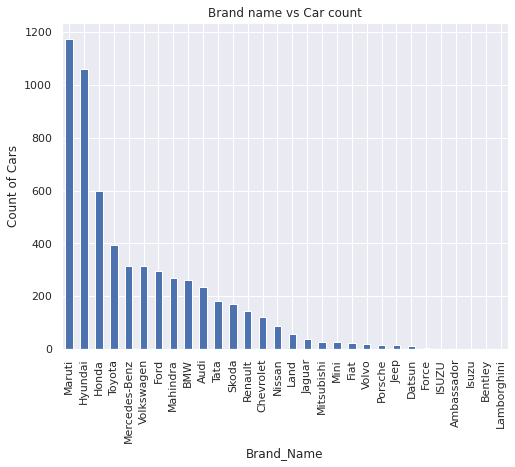

In [635]:
plt.xlabel("Brand_Name")
plt.ylabel("Count of Cars")
plt.title("Brand name vs Car count")
train_df['Brand_Name'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

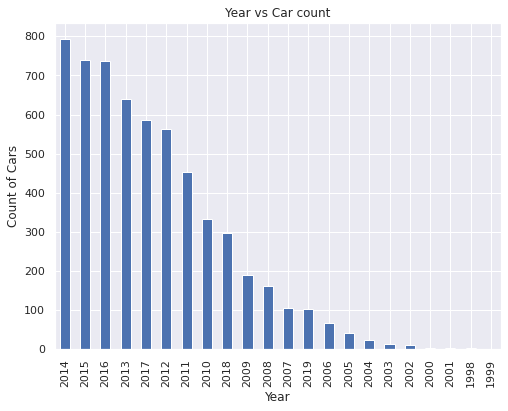

In [636]:
#Year Vs Car count
plt.xlabel("Year")
plt.ylabel("Count of Cars")
plt.title("Year vs Car count")
train_df['Year'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

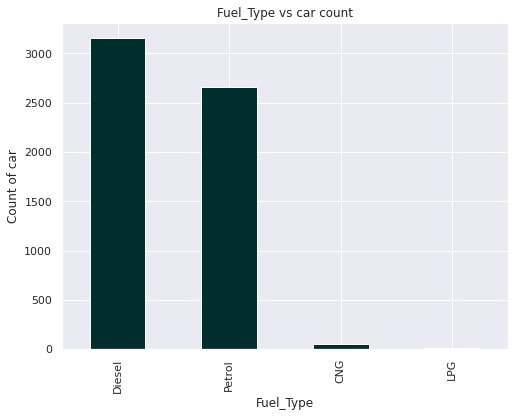

In [637]:
#fuel-type
plt.xlabel("Fuel_Type")
plt.ylabel("Count of car")
train_df['Fuel_Type'].value_counts().plot(kind='bar',title='Fuel_Type vs car count',color='#002e2e')
plt.show

<function matplotlib.pyplot.show>

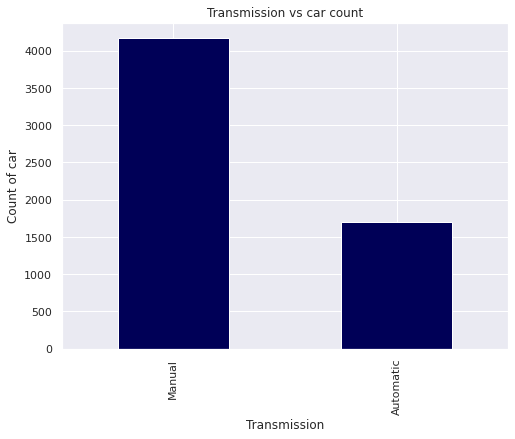

In [638]:
#Transmission
plt.xlabel("Transmission")
plt.ylabel("Count of car")
train_df['Transmission'].value_counts().plot(kind='bar',title='Transmission vs car count',color='#000057')
plt.show

<function matplotlib.pyplot.show>

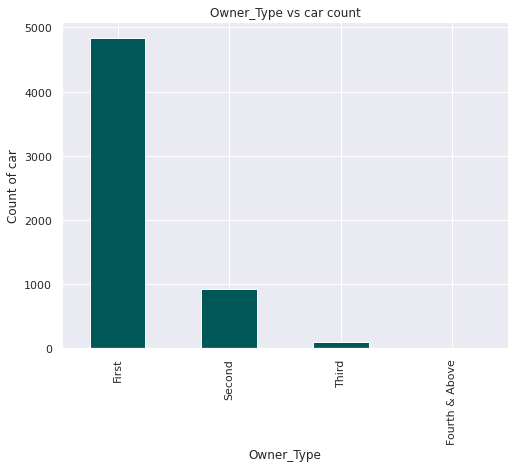

In [639]:
#owner type
plt.xlabel("Owner_Type")
plt.ylabel("Count of car")
train_df['Owner_Type'].value_counts().plot(kind='bar',title='Owner_Type vs car count',color='#005757')
plt.show

In [640]:
Fuel_Type = train_df['Fuel_Type']
Owner_Type = train_df['Owner_Type']
transmission_type = train_df['Transmission']
Year = train_df['Year']
Price = train_df['Price']

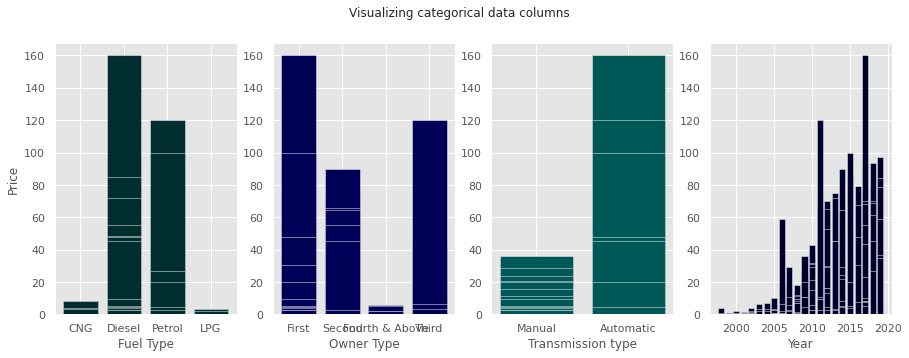

In [641]:
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,4,1)
plt.bar(Fuel_Type, Price, color='#002e2e')
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.subplot(1,4,2)
plt.bar(Owner_Type, Price, color='#000057')
plt.xlabel("Owner Type")
plt.subplot(1,4,3)
plt.bar(transmission_type, Price, color='#005757')
plt.xlabel('Transmission type')
plt.subplot(1,4,4)
plt.bar(Year, Price, color='#00002e')
plt.xlabel('Year')
plt.show()

In [642]:
 # Finding correlation of columns with Price
corr = train_df.corr()['Price']
corr

Year                 0.299475
Kilometers_Driven   -0.008249
Mileage             -0.341652
Engine               0.658047
Power                0.772843
Seats                0.055547
Price                1.000000
Name: Price, dtype: float64

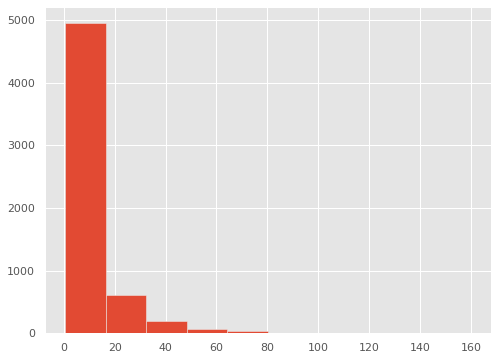

In [643]:
train_df["Price"].hist()

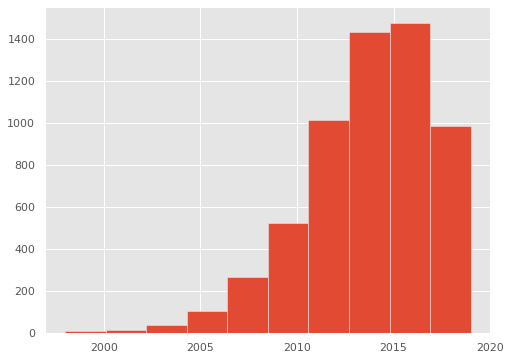

In [644]:
 train_df["Year"].hist()

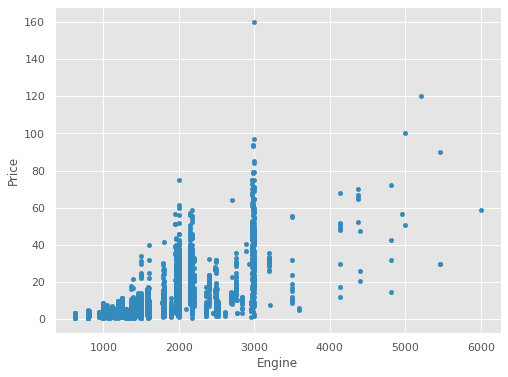

In [645]:
# Scatter plot
train_df.plot(x = 'Engine', y = 'Price', kind = 'scatter')

# 4. Feature Engineering 

In [646]:
#checking the distribution of categorical data 
print(train_df.Fuel_Type.value_counts())
print(train_df.Transmission.value_counts())
print(train_df.Owner_Type.value_counts())

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64


In [647]:
 # One hot encoding for Categorical data
train_df.replace({'Fuel_Type':{'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG':3}}, inplace = True)
train_df.replace({'Transmission':{'Automatic': 0, 'Manual': 1}}, inplace = True)
train_df.replace({'Owner_Type':{'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above':3}}, inplace = True)
train_df.head(5)

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0      Mumbai  2010              72000          2             1           0   
1        Pune  2015              41000          0             1           0   
2     Chennai  2011              46000          1             1           0   
3     Chennai  2012              87000          0             1           0   
4  Coimbatore  2013              40670          0             0           1   

   Mileage  Engine   Power  Seats  Price Brand_Name  
0    26.60     998   58.16    5.0   1.75     Maruti  
1    19.67    1582  126.20    5.0  12.50    Hyundai  
2    18.20    1199   88.70    5.0   4.50      Honda  
3    20.77    1248   88.76    7.0   6.00     Maruti  
4    15.20    1968  140.80    5.0  17.74       Audi

In [648]:
print(test_df.Fuel_Type.value_counts())
print(test_df.Transmission.value_counts())
print(test_df.Owner_Type.value_counts())

Diesel    631
Petrol    562
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64
Manual       878
Automatic    323
Name: Transmission, dtype: int64
First             1001
Second             175
Third               23
Fourth & Above       2
Name: Owner_Type, dtype: int64


In [649]:
test_df.replace({'Fuel_Type':{'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG':3}}, inplace = True)
test_df.replace({'Transmission':{'Automatic': 0, 'Manual': 1}}, inplace = True)
test_df.replace({'Owner_Type':{'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above':3}}, inplace = True)
test_df.head(5)

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
4                          Hyundai i20 Magna      Mumbai  2014   
5                     Mahindra XUV500 W8 2WD  Coimbatore  2016   

   Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0              40929          2             1           0    32.26     998   
1              54493          1             1           1    24.70     796   
2              34000          0             1           0    13.68    2393   
4              29000          1             1           0    18.50    1197   
5              85609          0             1           1    16.00    2179   

    Power  Seats  
0   58.20    4.0  
1   47.30    5.0  
2  147.80    7.0  
4   82.85    5.0  
5  140.00    7.0

4.1 Outlier detection and removing using IQR for trian set

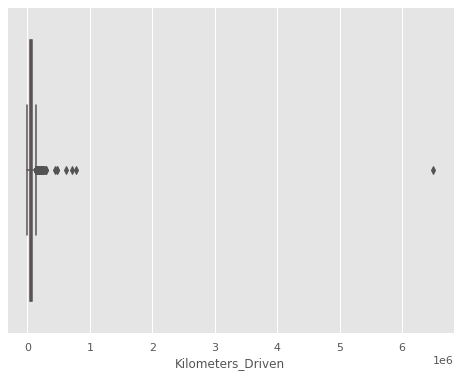

In [650]:
#ploting boxplot to check outliers
#Kilometers_Driven
sns.boxplot(x=train_df['Kilometers_Driven'])
plt.show()

In [651]:
Q1 = train_df.Kilometers_Driven.quantile(0.25)
Q3 = train_df.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [652]:
train_df[(train_df.Kilometers_Driven < lowerlimit)  | (train_df.Kilometers_Driven > upperlimit)]

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
29        Mumbai  2007             262000          0             1   
64       Chennai  2016             178000          0             1   
77       Chennai  2006             230000          1             1   
154         Pune  2012             136997          0             0   
164        Kochi  2014             147898          0             1   
...          ...   ...                ...        ...           ...   
5852     Chennai  2008             192000          0             1   
5871        Pune  2009             180000          0             1   
5914   Hyderabad  2003             132000          0             1   
5953      Jaipur  2012             140000          0             1   
5957  Coimbatore  2004             186679          1             1   

      Owner_Type  Mileage  Engine   Power  Seats  Price Brand_Name  
29             3     12.8    2494  102.00    7.0   4.00     Toyota  
64             0     25.0    1396   69.00    5.0   2.50       Tata  
77             2     12.4    1998  132.00    8.0   4.50     Toyota  
154            0     17.2    1968  138.10    5.0   8.50      Skoda  
164            0     22.7    1498   89.84    5.0   4.42       Ford  
...          ...      ...     ...     ...    ...    ...        ...  
5852           0     12.8    2494  102.00    8.0   6.85     Toyota  
5871           0     10.9    2499  143.00    7.0   7.50       Ford  
5914           0     18.7    1896   66.00    5.0   2.25      Skoda  
5953           0     20.0    1399   68.00    5.0   2.51       Ford  
5957           1     13.0    1493  100.00    5.0   1.76      Honda  

[199 rows x 12 columns]

In [653]:
traindf1 = train_df[(train_df.Kilometers_Driven > lowerlimit) & (train_df.Kilometers_Driven < upperlimit)]
traindf1.shape

(5673, 12)

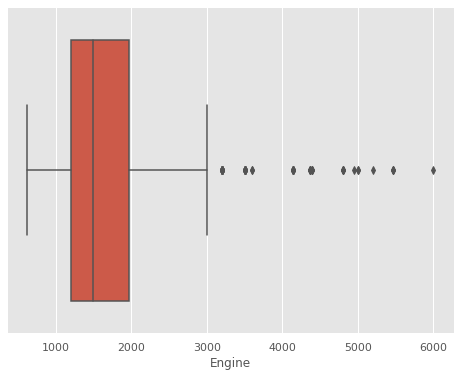

In [654]:
#Engine
sns.boxplot(x=traindf1['Engine'])
plt.show()

In [655]:
EQ1 = traindf1.Engine.quantile(0.25)
EQ3 = traindf1.Engine.quantile(0.75)
IQR = EQ3 - EQ1
Eupperlimit = EQ3 + (IQR * 1.5)
Elowerlimit = EQ1 - (IQR * 1.5)

In [656]:
traindf1[(traindf1.Engine < Elowerlimit)  | (traindf1.Engine > Eupperlimit)]

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
70        Mumbai  2008              73000          1             0   
152      Kolkata  2010              35277          1             0   
459   Coimbatore  2016              51002          0             0   
586        Kochi  2014              79926          0             0   
589    Bangalore  2006              47088          1             0   
693   Coimbatore  2016              22732          1             0   
703   Coimbatore  2017              50484          0             0   
798    Bangalore  2015              10000          1             0   
806   Coimbatore  2017              59636          0             0   
1038   Bangalore  2011              55000          0             0   
1076   Hyderabad  2016              68000          0             0   
1093   Bangalore  2014              50000          0             0   
1352   Bangalore  2012              66538          0             0   
1430       Kochi  2018              30552          0             0   
1596       Delhi  2008              71000          1             0   
1724       Delhi  2017              38000          0             0   
1930      Mumbai  2007              55000          1             0   
2100      Mumbai  2010              35000          1             0   
2669  Coimbatore  2018              51530          0             0   
2681   Hyderabad  2010              54000          1             0   
2978  Coimbatore  2010              42400          1             0   
3028  Coimbatore  2017              61108          0             0   
3065      Mumbai  2010              73000          1             0   
3079      Mumbai  2016              29000          0             0   
3115      Jaipur  2016              90000          0             0   
3196     Chennai  2019               9000          0             0   
3242   Bangalore  2012              63000          0             0   
3341       Kochi  2010              50161          1             0   
3580   Hyderabad  2010              29000          0             0   
4039      Mumbai  2011              82000          1             0   
4136      Mumbai  2009              68001          1             0   
4227     Chennai  2016              43000          0             0   
4342      Mumbai  2006             103000          1             0   
4388   Bangalore  2015              50000          0             0   
4451       Kochi  2018              21290          1             0   
4559       Delhi  2010              73000          0             0   
4627       Kochi  2010              65329          1             0   
4691   Bangalore  2014               3000          1             0   
4722     Kolkata  2010              35000          1             0   
4821      Mumbai  2011               5900          1             0   
4869  Coimbatore  2012              84384          0             0   
4906   Hyderabad  2018              15000          0             0   
4938  Coimbatore  2015              56238          0             0   
5088  Coimbatore  2011              43686          1             0   
5278       Delhi  2018              12000          0             0   
5323     Chennai  2017              17000          0             0   
5341  Coimbatore  2016              65003          0             0   
5414       Kochi  2014              45710          1             0   
5416  Coimbatore  2013              75995          0             0   
5441  Coimbatore  2017              54650          0             0   
5521   Hyderabad  2006              48000          1             0   
5603       Delhi  2013              36400          0             0   
5728     Kolkata  2009              43600          1             0   
5781       Delhi  2011               6500          1             0   
5885        Pune  2010              93000          1             0   
5919   Hyderabad  2015               8000          1             0   
6011   Hyderabad  

In [657]:
traindf2 = traindf1[(traindf1.Engine > Elowerlimit) & (traindf1.Engine < Eupperlimit)]
traindf2.shape

(5616, 12)

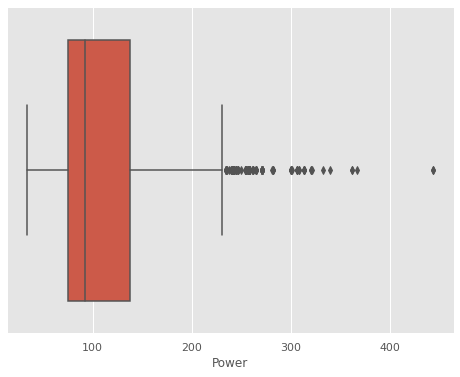

In [658]:
# Power
sns.boxplot(x=traindf2['Power'])
plt.show()

In [659]:
PQ1 = traindf2.Power.quantile(0.25)
PQ3 = traindf2.Power.quantile(0.75)
PIQR = PQ3 - PQ1
Pupperlimit = PQ3 + (PIQR * 1.5)
Plowerlimit = PQ1 - (PIQR * 1.5)

In [660]:
traindf2[(traindf2.Power < Plowerlimit)  | (traindf2.Power > Pupperlimit)]

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
38          Pune  2013              85000          0             0   
103      Kolkata  2010              30000          0             0   
107    Hyderabad  2011              78000          0             0   
134      Kolkata  2017              13372          1             0   
148       Mumbai  2013              23000          1             0   
...          ...   ...                ...        ...           ...   
5803     Chennai  2013             100000          0             0   
5868       Kochi  2014              51240          0             0   
5927  Coimbatore  2018              29091          0             0   
5946   Bangalore  2016              16000          0             0   
6008   Hyderabad  2013              40000          0             0   

      Owner_Type  Mileage  Engine   Power  Seats  Price     Brand_Name  
38             0    11.74    2987  254.80    5.0  28.00  Mercedes-Benz  
103            0    14.94    2967  241.40    5.0   9.80           Audi  
107            1    14.74    2993  270.90    5.0  24.00         Jaguar  
134            0    19.00    2996  362.07    2.0  54.00  Mercedes-Benz  
148            0    11.05    2894  444.00    4.0  37.00           Audi  
...          ...      ...     ...     ...    ...    ...            ...  
5803           1    11.30    2987  254.80    7.0  38.00  Mercedes-Benz  
5868           0     8.20    2993  245.00    4.0  29.52            BMW  
5927           0    13.22    2967  241.40    5.0  45.52           Audi  
5946           0    14.69    2993  258.00    5.0  48.00            BMW  
6008           1    17.85    2967  300.00    4.0  45.00        Porsche  

[193 rows x 12 columns]

In [661]:
traindf_final = traindf2[(traindf2.Power > Plowerlimit) & (traindf2.Power < Pupperlimit)]
traindf_final.shape

(5423, 12)

In [662]:
traindf_final

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0         Mumbai  2010              72000          2             1   
1           Pune  2015              41000          0             1   
2        Chennai  2011              46000          1             1   
3        Chennai  2012              87000          0             1   
4     Coimbatore  2013              40670          0             0   
...          ...   ...                ...        ...           ...   
6014       Delhi  2014              27365          0             1   
6015      Jaipur  2015             100000          0             1   
6016      Jaipur  2012              55000          0             1   
6017     Kolkata  2013              46000          1             1   
6018   Hyderabad  2011              47000          0             1   

      Owner_Type  Mileage  Engine   Power  Seats  Price Brand_Name  
0              0    26.60     998   58.16    5.0   1.75     Maruti  
1              0    19.67    1582  126.20    5.0  12.50    Hyundai  
2              0    18.20    1199   88.70    5.0   4.50      Honda  
3              0    20.77    1248   88.76    7.0   6.00     Maruti  
4              1    15.20    1968  140.80    5.0  17.74       Audi  
...          ...      ...     ...     ...    ...    ...        ...  
6014           0    28.40    1248   74.00    5.0   4.75     Maruti  
6015           0    24.40    1120   71.00    5.0   4.00    Hyundai  
6016           1    14.00    2498  112.00    8.0   2.90   Mahindra  
6017           0    18.90     998   67.10    5.0   2.65     Maruti  
6018           0    25.44     936   57.60    5.0   2.50  Chevrolet  

[5423 rows x 12 columns]

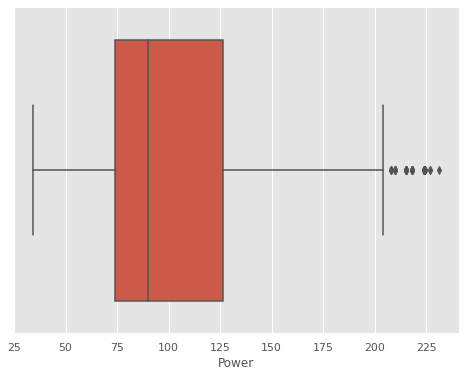

In [663]:
#Power
sns.boxplot(x=traindf_final['Power'])
plt.show()

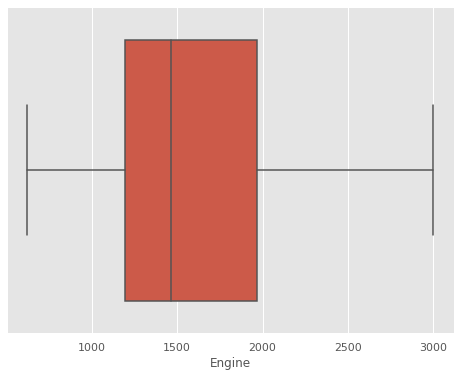

In [664]:
#Engine
sns.boxplot(x=traindf_final['Engine'])
plt.show()

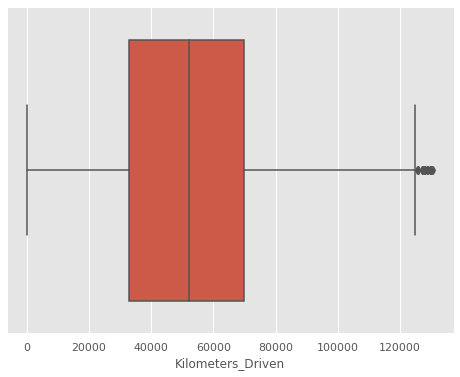

In [665]:
#Kilometers_Driven
sns.boxplot(x=traindf_final['Kilometers_Driven'])
plt.show()

4.2 Outlier detection and removing using IQR for testing data

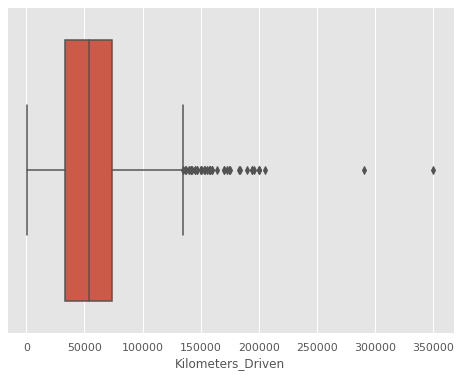

In [666]:
#Kilometers_Driven
sns.boxplot(x=test_df['Kilometers_Driven'])
plt.show()

In [667]:
Q1 = test_df.Kilometers_Driven.quantile(0.25)
Q3 = test_df.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [668]:
test_df[(test_df.Kilometers_Driven < lowerlimit)  | (test_df.Kilometers_Driven > upperlimit)]

Name   Location  Year  \
17                Ford Ikon 1.4 TDCi DuraTorq    Chennai  2009   
20                            Maruti Ritz LDi       Pune  2016   
58             Tata Indigo CS LX (TDI) BS III    Chennai  2011   
87          Tata Manza Club Class Safire90 LX      Kochi  2010   
142          Volkswagen Vento Diesel Highline     Jaipur  2011   
223                Tata Sumo EX 10/7 Str BSII    Chennai  2015   
265       Toyota Innova 2.5 V Diesel 8-seater  Hyderabad  2008   
269     Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad  2005   
270                Mahindra Xylo E8 ABS BS IV     Jaipur  2009   
291     Toyota Innova 2.5 G (Diesel) 8 Seater     Mumbai  2007   
332     Toyota Innova 2.5 G (Diesel) 7 Seater       Pune  2015   
350                 Tata Indigo eCS eLX BS IV       Pune  2013   
353               Fiat Linea Emotion (Diesel)     Mumbai  2009   
366                Toyota Fortuner 3.0 Diesel    Chennai  2011   
383               Maruti Swift Dzire Tour LDI       Pune  2013   
389                Maruti Omni MPI CARGO BSIV       Pune  2013   
392                         Toyota Corolla H2    Chennai  2006   
421                    Maruti Swift Dzire VDI       Pune  2015   
460                    Toyota Fortuner 4x4 MT       Pune  2011   
488                       Mahindra Bolero SLX     Jaipur  2013   
538      Toyota Innova 2.5 G4 Diesel 8-seater  Hyderabad  2008   
547    Toyota Innova 2.5 VX (Diesel) 8 Seater  Hyderabad  2012   
596                     Honda CR-V 2.4 4WD AT    Chennai  2005   
612                    Toyota Fortuner 4x2 AT      Delhi  2014   
633                    Toyota Fortuner 4x2 AT  Hyderabad  2013   
687                    Maruti Swift Dzire VXi    Chennai  2012   
773    Toyota Innova 2.5 GX (Diesel) 8 Seater    Chennai  2014   
778      Toyota Innova 2.5 G4 Diesel 7-seater       Pune  2010   
855                  Tata Indica Vista TDI LS       Pune  2015   
892       Toyota Innova 2.5 V Diesel 7-seater  Bangalore  2009   
900                   ISUZU D-MAX V-Cross 4X4     Jaipur  2017   
902               Maruti Swift Dzire Tour LDI     Jaipur  2012   
924             Hyundai Sonata Embera 2.4L MT       Pune  2006   
933                 Honda Amaze VX CVT i-VTEC     Jaipur  2017   
952                   Renault Lodgy 110PS RxL    Chennai  2015   
1028            Toyota Corolla Executive (HE)  Hyderabad  2007   
1062            Maruti Swift VDi BSIII W/ ABS     Jaipur  2008   
1119            Toyota Corolla Executive (HE)    Chennai  2003   
1130                     Hyundai Elantra CRDi     Mumbai  2006   
1164                    Hyundai Verna CRDi SX  Hyderabad  2009   
1179  Land Rover Discovery 4 TDV6 Auto Diesel  Hyderabad  2012   
1181                          Maruti Ritz LDi       Pune  2015   
1194           Tata Indica Vista Quadrajet LS  Hyderabad  2013   
1208    Mahindra Renault Logan 1.5 DLE Diesel    Chennai  2007   

      Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
17               140000          0             1           0    13.80    1399   
20               200000          0             1           0    23.20    1248   
58               150000          0             1           1    19.09    1396   
87               142299          1             1           0    13.07    1368   
142              157301          0             1           1    20.54    1598   
223              196000          0             1           1    12.20    1948   
265              200000          0             1           1    12.80    2494   
269              150000          0             1           1    14.80    2499   
270              145278          0             1           1    11.68    2498   
291              194000          0             1           0    12.99    2494   
332              205000          0             1           0    12.99    2494   
350              155550          0             1           0    25.00    1396   
353              

In [669]:
testdf1 = test_df[(test_df.Kilometers_Driven > lowerlimit) & (test_df.Kilometers_Driven < upperlimit)]
testdf1.shape

(1157, 11)

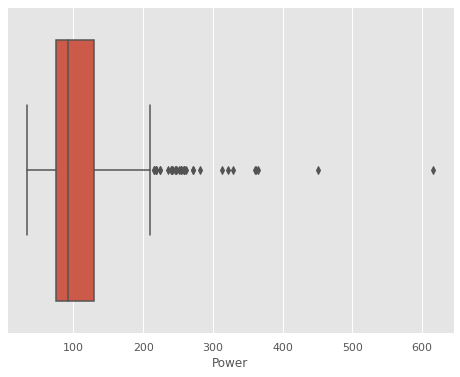

In [670]:
#Power
sns.boxplot(x=testdf1['Power'])
plt.show()

In [671]:
PQ1 = test_df.Power.quantile(0.25)
PQ3 = test_df.Power.quantile(0.75)
PIQR = PQ3 - PQ1
Pupperlimit = PQ3 + (PIQR * 1.5)
Plowerlimit = PQ1 - (PIQR * 1.5)

In [672]:
test_df[(test_df.Power < Plowerlimit)  | (test_df.Power > Pupperlimit)]

Name    Location  Year  \
117                             BMW 5 Series 525d Sedan       Kochi  2012   
126     Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury   Bangalore  2016   
165      Mercedes-Benz GL-Class 350 CDI Blue Efficiency       Kochi  2015   
167             Mercedes-Benz S Class 2005 2013 S 350 L      Mumbai  2008   
185                           Audi A8 L 3.0 TDI quattro       Kochi  2013   
193                    BMW 7 Series 730Ld DPE Signature     Chennai  2017   
202                                    Jaguar XF Diesel     Kolkata  2014   
260                                 Jaguar XE Portfolio  Coimbatore  2018   
289      Mercedes-Benz GL-Class 350 CDI Blue Efficiency     Chennai  2015   
293                Audi Q7 3.0 TDI Quattro Premium Plus  Coimbatore  2015   
335                             Bentley Flying Spur W12   Bangalore  2008   
369                                    BMW X6 xDrive30d  Coimbatore  2014   
415                      Land Rover Discovery 4 SDV6 SE       Kochi  2012   
471                                  BMW 7 Series 730Ld      Mumbai  2013   
496                        BMW 5 Series 530i Sport Line     Kolkata  2011   
529                                        BMW X3 2.5si   Bangalore  2009   
550                                    BMW X6 xDrive30d   Hyderabad  2011   
602      Mercedes-Benz GL-Class 350 CDI Blue Efficiency   Hyderabad  2013   
634                                Volvo S60 D5 Kinetic   Hyderabad  2011   
645                 BMW 5 Series 2013-2017 530d M Sport   Bangalore  2015   
685           Mercedes-Benz S Class 2005 2013 S 350 CDI   Hyderabad  2011   
721                              Porsche Cayenne Diesel   Bangalore  2014   
790                                        Volvo S80 D5       Delhi  2011   
805                      Jaguar XF 2.0 Petrol Portfolio     Kolkata  2017   
813                        BMW 7 Series 2007-2012 730Ld   Hyderabad  2009   
823                                      Nissan 370Z AT     Kolkata  2012   
827                             BMW 6 Series Gran Coupe       Kochi  2014   
889                Jaguar XF 3.0 Litre S Premium Luxury   Hyderabad  2011   
891                    Mercedes-Benz M-Class ML 320 CDI   Hyderabad  2008   
941                            Mercedes-Benz SLC 43 AMG  Coimbatore  2018   
945                              Mercedes-Benz GLE 350d   Hyderabad  2016   
956                     Audi A4 3.0 TDI Quattro Premium   Bangalore  2011   
975                 BMW 5 Series 2013-2017 530d M Sport       Kochi  2018   
979                   BMW 5 Series 2007-2010 525d Sedan      Mumbai  2008   
1038                            BMW 6 Series 650i Coupe       Delhi  2009   
1056                BMW 5 Series 2013-2017 530d M Sport       Kochi  2015   
1075                 Audi Q5 3.0 TDI Quattro Technology   Bangalore  2017   
1098                           Mercedes-Benz CLA 45 AMG       Kochi  2015   
1105                  Audi Q5 2008-2012 3.0 TDI Quattro   Hyderabad  2010   
1137                            BMW 7 Series 740i Sedan       Kochi  2013   
1179            Land Rover Discovery 4 TDV6 Auto Diesel   Hyderabad  2012   
1197  BMW X5 xDrive 30d Design Pure Experience 5 Seater       Delhi  2015   
1222                            BMW 5 Series 525d Sedan       Delhi  2012   

      Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
117               61665          0             0           0    16.73    2993   
126               26900          0             0           0    12.00    2987   
165               69095          0             0           0    11.30    2987   
167               65000          1             0           2    10.13    3498   
185               66848          0             0           0    11.80    2967   
193               16000          0             0           0    16.77    2993   
202               12000          0             0           0    14.74    2993   
260           

In [673]:
testdf_final = test_df[(test_df.Power > Plowerlimit) & (test_df.Power < Pupperlimit)]
testdf_final.shape

(1158, 11)

In [674]:
traindf_final

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0         Mumbai  2010              72000          2             1   
1           Pune  2015              41000          0             1   
2        Chennai  2011              46000          1             1   
3        Chennai  2012              87000          0             1   
4     Coimbatore  2013              40670          0             0   
...          ...   ...                ...        ...           ...   
6014       Delhi  2014              27365          0             1   
6015      Jaipur  2015             100000          0             1   
6016      Jaipur  2012              55000          0             1   
6017     Kolkata  2013              46000          1             1   
6018   Hyderabad  2011              47000          0             1   

      Owner_Type  Mileage  Engine   Power  Seats  Price Brand_Name  
0              0    26.60     998   58.16    5.0   1.75     Maruti  
1              0    19.67    1582  126.20    5.0  12.50    Hyundai  
2              0    18.20    1199   88.70    5.0   4.50      Honda  
3              0    20.77    1248   88.76    7.0   6.00     Maruti  
4              1    15.20    1968  140.80    5.0  17.74       Audi  
...          ...      ...     ...     ...    ...    ...        ...  
6014           0    28.40    1248   74.00    5.0   4.75     Maruti  
6015           0    24.40    1120   71.00    5.0   4.00    Hyundai  
6016           1    14.00    2498  112.00    8.0   2.90   Mahindra  
6017           0    18.90     998   67.10    5.0   2.65     Maruti  
6018           0    25.44     936   57.60    5.0   2.50  Chevrolet  

[5423 rows x 12 columns]

In [675]:
testdf_final

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
4                                     Hyundai i20 Magna      Mumbai  2014   
5                                Mahindra XUV500 W8 2WD  Coimbatore  2016   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0                 40929          2             1           0    32.26     998   
1                 54493          1             1           1    24.70     796   
2                 34000          0             1           0    13.68    2393   
4                 29000          1             1           0    18.50    1197   
5                 85609          0             1           1    16.00    2179   
...                 ...        ...           ...         ...      ...     ...   
1229              89411          0             1           0    20.54    1598   
1230              59000          1             0           0    17.21    1197   
1231              28000          0             1           0    23.08    1461   
1232              52262          1             0           2    17.20    1197   
1233              72443          0             0           0    10.00    2148   

       Power  Seats  
0      58.20    4.0  
1      47.30    5.0  
2     147.80    7.0  
4      82.85    5.0  
5     140.00    7.0  
...      ...    ...  
1229  103.60    5.0  
1230  103.60    5.0  
1231   63.10    5.0  
1232  103.60    5.0  
1233  170.00    5.0  

[1158 rows x 11 columns]

Log Transformation for training data

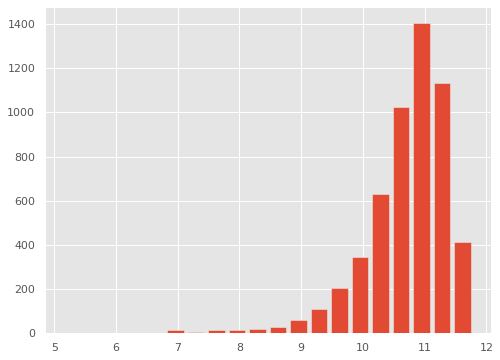

In [676]:
#Applying Log transformation to Kilometers driven
x = np.log(traindf_final['Kilometers_Driven'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

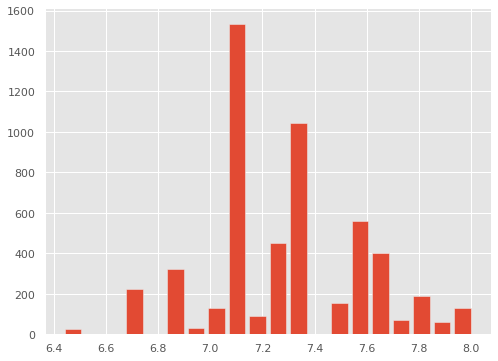

In [677]:
#Applying Log transformation to Engine
x = np.log(traindf_final['Engine'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

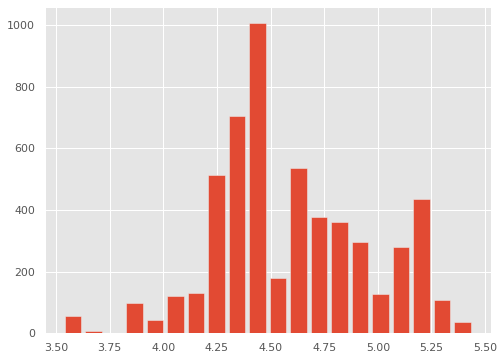

In [678]:
#Applying Log transformation to Power
x = np.log(traindf_final['Power'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

Log Transfromation for test data

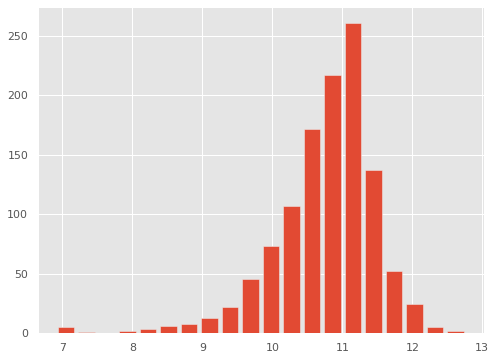

In [679]:
#Applying Log transformation to Kilometers driven
x = np.log(testdf_final['Kilometers_Driven'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

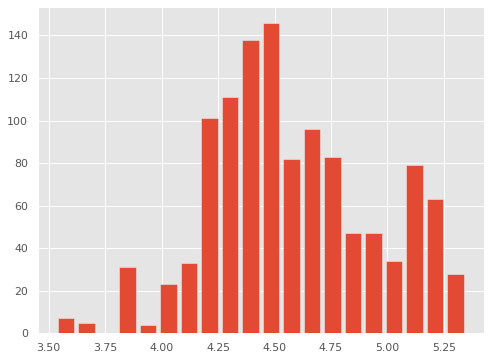

In [680]:
#Applying Log transformation to Engine
x = np.log(testdf_final['Power'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

Feature scaling using MinMax Scaler for training data

In [681]:
traindf_final.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
Brand_Name            object
dtype: object

In [682]:
numeric_columns = ['Year','Kilometers_Driven','Mileage','Engine', 'Power', 'Seats', 'Price']
numericdf = traindf_final[numeric_columns]

In [683]:
 numericdf.isna().sum()

Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [684]:
# Dataframe before scaling
numericdf.head()

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price
0  2010              72000    26.60     998   58.16    5.0   1.75
1  2015              41000    19.67    1582  126.20    5.0  12.50
2  2011              46000    18.20    1199   88.70    5.0   4.50
3  2012              87000    20.77    1248   88.76    7.0   6.00
4  2013              40670    15.20    1968  140.80    5.0  17.74

In [685]:
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [686]:
#dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

Year  Kilometers_Driven   Mileage    Engine     Power  Seats     Price
0  0.571429           0.549912  0.793083  0.157474  0.121686  0.375  0.021543
1  0.809524           0.312581  0.586464  0.403368  0.467242  0.375  0.198323
2  0.619048           0.350860  0.542636  0.242105  0.276790  0.375  0.066765
3  0.666667           0.664750  0.619261  0.262737  0.277095  0.625  0.091432
4  0.714286           0.310054  0.453190  0.565895  0.541392  0.375  0.284493

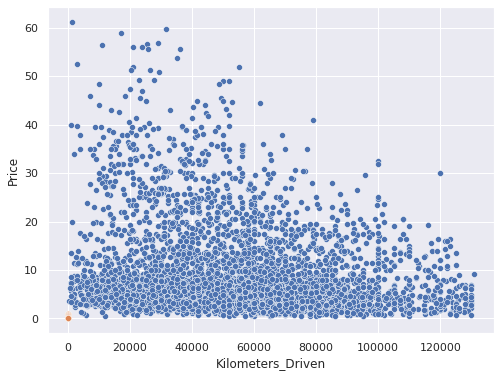

In [687]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=traindf_final,x='Kilometers_Driven',y='Price')
sns.scatterplot(data = transformdf,x='Kilometers_Driven',y='Price')
plt.show()

Feature scaling using Minmax Scaler for testing data

In [688]:
testdf_final.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
dtype: object

In [689]:
test_numeric_columns = ['Year','Kilometers_Driven','Mileage','Power', 'Seats']
test_numericdf = testdf_final[test_numeric_columns]

In [690]:
# Dataframe before scaling
test_numericdf.head()

Year  Kilometers_Driven  Mileage   Power  Seats
0  2014              40929    32.26   58.20    4.0
1  2013              54493    24.70   47.30    5.0
2  2017              34000    13.68  147.80    7.0
4  2014              29000    18.50   82.85    5.0
5  2016              85609    16.00  140.00    7.0

In [691]:
test_scaler = MinMaxScaler(feature_range=(0, 1))
test_numeric = scaler.fit_transform(test_numericdf)

In [692]:
#dataframe after scaling
test_transformdf = pd.DataFrame(data=test_numeric,columns=test_numeric_columns)
test_transformdf.head()

Year  Kilometers_Driven   Mileage     Power     Seats
0  0.736842           0.114410  1.000000  0.136519  0.000000
1  0.684211           0.153275  0.765654  0.074516  0.166667
2  0.894737           0.094556  0.424055  0.646189  0.500000
3  0.736842           0.080229  0.573466  0.276735  0.166667
4  0.842105           0.242433  0.495970  0.601820  0.500000

In [693]:
## Performing label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [694]:
traindf_final['Brand_Name'] = label_encoder.fit_transform(traindf_final['Brand_Name'])
traindf_final['Location'] = label_encoder.fit_transform(traindf_final['Location'])
traindf_final['Fuel_Type'] = label_encoder.fit_transform(traindf_final['Fuel_Type'])
traindf_final['Transmission'] = label_encoder.fit_transform(traindf_final['Transmission'])
traindf_final['Owner_Type'] = label_encoder.fit_transform(traindf_final['Owner_Type'])

testdf_final['Location'] = label_encoder.fit_transform(testdf_final['Location'])
testdf_final['Fuel_Type'] = label_encoder.fit_transform(testdf_final['Fuel_Type'])
testdf_final['Transmission'] = label_encoder.fit_transform(testdf_final['Transmission'])
testdf_final['Owner_Type'] = label_encoder.fit_transform(testdf_final['Owner_Type'])

traindf_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0         9  2010              72000          2             1           0   
1        10  2015              41000          0             1           0   
2         2  2011              46000          1             1           0   
3         2  2012              87000          0             1           0   
4         3  2013              40670          0             0           1   

   Mileage  Engine   Power  Seats  Price  Brand_Name  
0    26.60     998   58.16    5.0   1.75          16  
1    19.67    1582  126.20    5.0  12.50           9  
2    18.20    1199   88.70    5.0   4.50           8  
3    20.77    1248   88.76    7.0   6.00          16  
4    15.20    1968  140.80    5.0  17.74           1

# 5. Training Model

In [695]:
y = traindf_final.Price
X = traindf_final.drop(['Price'],axis=1)

In [696]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

In [697]:
 # Creating the model using scikit learn 
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [698]:
model1 = RandomForestRegressor(n_estimators=200)
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

# 6. Prediction

In [699]:
y_pred = model.predict(X_valid)
y_pred

array([-2.37001005,  1.77075111,  7.1920556 , ...,  1.21557058,
        2.23753517, -2.22348935])

In [700]:
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print("R2 score : %f" % r2_score(y_valid,y_pred))
print('MSE: ', metrics.mean_squared_error(y_valid, y_pred))

Mean Absolute Error: 2.8821780695866526
Root Mean Squared Error: 4.502211191924593
R2 score : 0.695859
MSE:  20.26990561669106


In [701]:
y_pred1 = model1.predict(X_valid)
y_pred1

array([2.7146 , 2.2651 , 8.67505, ..., 3.93635, 4.0163 , 1.93775])

In [702]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 1.234525209896862
Mean Squared Error: 5.85241264365568
Root Mean Squared Error: 2.4191760257690387
R2 score : 0.912187


# 7. Evaluating your Model

In [703]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.6938497538024098
Test set accuracy :  0.695858864132858


In [704]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(100)

Actual Price  Predicted Price
2133          2.70        -2.370010
1059          2.45         1.770751
2463          7.75         7.192056
4163         20.50        22.484428
2656          1.00        -8.071521
...            ...              ...
1144         30.42        17.584065
4238          2.61         1.191622
3616          8.25         7.889567
4782         19.25        17.888984
4135          3.75         2.313288

[100 rows x 2 columns]

In [705]:
Y_train_predicted1 = model1.predict(X_train)
Y_test_predicted1 = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted1))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted1))

Train set accuracy:  0.9890865445098443
Test set accuracy :  0.9121870884520068


In [706]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 1.234525209896862
Mean Squared Error: 5.85241264365568
Root Mean Squared Error: 2.4191760257690387
R2 score : 0.912187


In [707]:
Result1 = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted1})
Result1.head(100)

Actual Price  Predicted Price
2133          2.70         2.714600
1059          2.45         2.265100
2463          7.75         8.675050
4163         20.50        22.216900
2656          1.00         0.872463
...            ...              ...
1144         30.42        23.431300
4238          2.61         2.915450
3616          8.25         7.290700
4782         19.25        21.808100
4135          3.75         3.201050

[100 rows x 2 columns]

# SUBMISSION DATE: 2nd April 2022